In [11]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
np.set_printoptions(threshold=np.inf)

In [20]:
# load predictions for train and val data
predictions = pickle.load(open('predictions.pkl', 'rb'))
train_predictions = [x.flatten() for x in predictions['train_preds']]
val_predictions = [x.flatten() for x in predictions['val_preds']]
train_truth = predictions['train_truths']
val_truth = predictions['val_truths']
train_keys = predictions['train_ids']
val_keys = predictions['val_ids']
# predictions are a list of numpy arrays. Each list element corresponds to a batch of data (32 samples)
# to get the keys you will need to 
train_predictions[0].shape, val_predictions[0].shape, train_truth[0].shape, val_truth[0].shape

((8446,), (8144,), (8446,), (8144,))

In [23]:
# read the full_filtered.csv dataset to get the sequence lengths
data = pd.read_csv('data/full_filtered.csv')
data.head()
chain_info = data.set_index('PDBchain')['Sequence'].to_dict()
chain_info = {k: len(v) for k, v in chain_info.items()}

In [24]:
# get the first protein of first batch, check sequence length and extract the predictions
first_protein = train_keys[0][0]
train_preds_example = train_predictions[0][:chain_info[first_protein]]
train_truths_example = train_truth[0][:chain_info[first_protein]]

In [25]:
train_preds_example.shape

(178,)

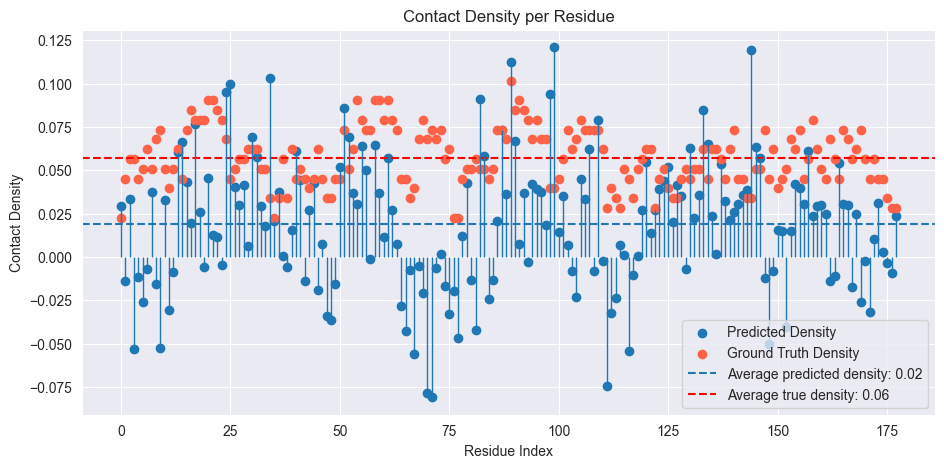

In [26]:
# plot the first 70 predictions and ground truths
train_preds_example_mean = np.mean(train_preds_example)
train_truths_example_mean = np.mean(train_truths_example)
plt.figure(figsize=(11, 5))
plt.scatter(range(len(train_preds_example)), train_preds_example, label="Predicted Density")
plt.scatter(range(len(train_truths_example)), train_truths_example, c="tomato", label="Ground Truth Density")
plt.axhline(y=train_preds_example_mean, linestyle='--', label=f"Average predicted density: {train_preds_example_mean:.2f}")
plt.axhline(y=train_truths_example_mean, color='r', linestyle='--', label=f"Average true density: {train_truths_example_mean:.2f}")
plt.vlines(x=range(len(train_preds_example)), linestyle='-', linewidth=1, ymin=0, ymax=train_preds_example)
plt.xlabel("Residue Index")
plt.ylabel("Contact Density")
plt.title("Contact Density per Residue")
plt.legend()
plt.show()